In [1]:
# Importar librerías necesarias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Configuración de GPU
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("🔧 GPU configurada correctamente")
else:
    print("🔧 Usando CPU")

# Seeds para reproducibilidad
tf.random.set_seed(42)
np.random.seed(42)

print("✅ Entorno TensorFlow/Keras configurado correctamente")

🔧 GPU configurada correctamente
✅ Entorno TensorFlow/Keras configurado correctamente


In [2]:
# === PREPARAR DATASET CIFAR-10 ===

print("📊 PREPARANDO DATASET CIFAR-10")
print("-" * 50)

# 1. Cargar dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()  # dataset CIFAR-10

# 2. Normalizar imágenes (0-255 -> 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 3. Convertir labels a categorical (one-hot encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 4. Definir nombres de clases
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print("📊 INFORMACIÓN DEL DATASET:")
print(f"   📈 Entrenamiento: {x_train.shape[0]} imágenes")
print(f"   🧪 Test: {x_test.shape[0]} imágenes")
print(f"   📐 Dimensiones: {x_train.shape[1:]} (HxWxC)")
print(f"   📋 Clases: {num_classes}")

# 5. Configurar batch size para entrenamiento
batch_size = 128
print(f"   📦 Batch size: {batch_size}")

📊 PREPARANDO DATASET CIFAR-10
--------------------------------------------------
📊 INFORMACIÓN DEL DATASET:
   📈 Entrenamiento: 50000 imágenes
   🧪 Test: 10000 imágenes
   📐 Dimensiones: (32, 32, 3) (HxWxC)
   📋 Clases: 10
   📦 Batch size: 128


In [3]:
# === CNN SIMPLE DESDE CERO ===

print("🏗️ IMPLEMENTANDO CNN SIMPLE")
print("-" * 50)

def create_simple_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = keras.Sequential([
        # Bloque convolucional 1 (bloque donde aprende a crear flitros)
        layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)), # reduce el tamaño de los mapas de caracteristicas

        # Bloque convolucional 2 (bloque donde aprende a crear flitros)
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),

        # Clasificador
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Crear modelo CNN simple
simple_cnn = create_simple_cnn()

# Compilar modelo
simple_cnn.compile(
    optimizer=optimizers.AdamW(learning_rate=0.001),  # optimizador popular
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Mostrar arquitectura
simple_cnn.summary()

# Contar parámetros
total_params = simple_cnn.count_params()
print(f"🏗️ MODELO CNN SIMPLE:")
print(f"   🔢 Parámetros: {total_params:,}")

🏗️ IMPLEMENTANDO CNN SIMPLE
--------------------------------------------------


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,122,186 (8.10 MB)

 Trainable params: 2,122,186 (8.10 MB)

 Non-trainable params: 0 (0.00 B)

🏗️ MODELO CNN SIMPLE:
   🔢 Parámetros: 2,122,186


In [5]:
# --- PARCHE PARA ERROR 403: Descarga manual de pesos ---

print("🌎 Descargando pesos de EfficientNetB0 manualmente...")
import os

# URL del espejo oficial de TensorFlow
url_espejo = "https://storage.googleapis.com/tensorflow/keras-applications/efficientnet/efficientnetb0_notop.h5"
path_local = "/tmp/efficientnetb0_notop.h5"

# Usamos !wget para la descarga
!wget -q -O {path_local} {url_espejo}

# Verificamos que el archivo exista
if os.path.exists(path_local):
    print(f"✅ Pesos descargados y guardados en: {path_local}")
else:
    print(f"❌ ERROR: La descarga manual también falló. Verifica la conexión.")

🌎 Descargando pesos de EfficientNetB0 manualmente...
✅ Pesos descargados y guardados en: /tmp/efficientnetb0_notop.h5


In [7]:
# === TRANSFER LEARNING CON EFFICIENTNETB0
from tensorflow.keras import applications
print("🎯 IMPLEMENTANDO TRANSFER LEARNING EFFICIENTNETB0")
print("-" * 50)

def create_transfer_model(input_shape=(32, 32, 3), num_classes=10):
    # Usamos EfficientNetB0
    base_model = applications.EfficientNetB0(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape,
        pooling='avg'  # Usa average pooling para reducir parámetros
    )
    base_model.trainable = False  # Solo entrenás las capas nuevas

    # El "head clasificador
    model = keras.Sequential([
        base_model,
        layers.BatchNormalization(),      # estabiliza entrenamiento
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),              # previene overfitting
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# 2. Crear modelo
transfer_model = create_transfer_model()

# Compilar modelo (EXACTAMENTE EL MISMO)
transfer_model.compile(
    optimizer=optimizers.AdamW(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Mostrar arquitectura
transfer_model.summary()

# Contar parámetros
total_params = transfer_model.count_params()
trainable_params = sum([tf.keras.backend.count_params(w) for w in transfer_model.trainable_weights])

print("🎯 MODELO CON TRANSFER LEARNING (EfficientNetB0):") # <- Título actualizado
print(f"   🔢 Parámetros totales: {total_params:,}")
print(f"   🔓 Parámetros entrenables: {trainable_params:,}")

# 3. Fine-tuning opcional (EXACTAMENTE EL MISMO)
def setup_fine_tuning(model, unfreeze_layers=10):
    base_model = model.layers[0]
    base_model.trainable = True

    # Congelar todas menos las últimas N capas
    for layer in base_model.layers[:-unfreeze_layers]:
        layer.trainable = False

    model.compile(
        optimizer=optimizers.AdamW(learning_rate=1e-4),  # aún más bajo para fine-tuning
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    trainable = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
    print(f"🔓 Fine-tuning configurado - Parámetros entrenables: {trainable:,}")

    return model

# Para activar fine-tuning en últimas capas:
# transfer_model = setup_fine_tuning(transfer_model, unfreeze_layers=10)

🎯 IMPLEMENTANDO TRANSFER LEARNING EFFICIENTNETB0
--------------------------------------------------


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 1280)           │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385,197 (16.73 MB)

 Trainable params: 333,066 (1.27 MB)

 Non-trainable params: 4,052,131 (15.46 MB)

🎯 MODELO CON TRANSFER LEARNING (EfficientNetB0):
   🔢 Parámetros totales: 4,385,197
   🔓 Parámetros entrenables: 333,066


In [8]:
# === ENTRENAMIENTO DE MODELOS ===

print("🏋️ CONFIGURANDO ENTRENAMIENTO")
print("-" * 50)

# Configurar callbacks (sin cambios)
callbacks_list = [
    callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=3,
        restore_best_weights=True
    )
]

# === DATA AUGMENTATION ===
print("🧩 APLICANDO DATA AUGMENTATION")
print("-" * 50)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crea un generador con transformaciones suaves (sin cambios)
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Ajusta el generador a los datos de entrenamiento (sin cambios)
datagen.fit(x_train)

print("✅ Data augmentation configurado correctamente")

# --- Entrenamiento CNN simple ---
print("🏗️ ENTRENANDO CNN SIMPLE (CON DATA AUGMENTATION)...")
# !! CAMBIO IMPORTANTE: Usamos datagen.flow para una comparación justa !!
simple_history = simple_cnn.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=10, # Puedes aumentar esto (ej. 20) ya que datagen hace más difícil el overfitting
    validation_data=(x_test, y_test),
    callbacks=callbacks_list,
    verbose=1
)

# --- Entrenamiento Transfer Learning (Etapa 1: Feature Extraction) ---
print("\n🎯 ENTRENANDO TRANSFER LEARNING (EfficientNetB0) - Etapa 1: Head...")
transfer_history = transfer_model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=callbacks_list,
    verbose=1
)

# --- Entrenamiento Transfer Learning (Etapa 2: Fine-Tuning) ---
print("\n🔓 ACTIVANDO FINE-TUNING EN LAS ÚLTIMAS CAPAS DE EFFICIENTNETB0")
print("-" * 50)


# Esto descongela la base, la re-compila con LR bajo (1e-4) y ajusta los pesos.
transfer_model = setup_fine_tuning(transfer_model, unfreeze_layers=10) # Descongelamos las últimas 10

# Continuamos el entrenamiento con el modelo ya re-compilado
print("🎯 ENTRENANDO FINE-TUNING (EfficientNetB0) - Etapa 2...")
# Nota: transfer_history contiene la Etapa 1, fine_tune_history la Etapa 2
fine_tune_history = transfer_model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size), # Seguimos usando datagen
    epochs=10, # Entrenamos 10 épocas más de fine-tuning
    validation_data=(x_test, y_test),
    callbacks=callbacks_list,
    verbose=1
)

print("✅ Fine-tuning completado correctamente")

# --- Extracción de Métricas (Corregido) ---
simple_train_acc = simple_history.history['accuracy']
simple_test_acc = simple_history.history['val_accuracy']
simple_history_loss = simple_history.history['loss']
simple_history_val_loss = simple_history.history['val_loss']

# !! CAMBIO IMPORTANTE: Unimos los historiales para la gráfica completa !!
transfer_train_acc = transfer_history.history['accuracy'] + fine_tune_history.history['accuracy']
transfer_test_acc = transfer_history.history['val_accuracy'] + fine_tune_history.history['val_accuracy']
transfer_history_loss = transfer_history.history['loss'] + fine_tune_history.history['loss']
transfer_history_val_loss = transfer_history.history['val_loss'] + fine_tune_history.history['val_loss']

🏋️ CONFIGURANDO ENTRENAMIENTO
--------------------------------------------------
🧩 APLICANDO DATA AUGMENTATION
--------------------------------------------------
✅ Data augmentation configurado correctamente
🏗️ ENTRENANDO CNN SIMPLE (CON DATA AUGMENTATION)...
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 78ms/step - accuracy: 0.3425 - loss: 1.8115 - val_accuracy: 0.5544 - val_loss: 1.2546
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.5289 - loss: 1.3254 - val_accuracy: 0.6138 - val_loss: 1.0997
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.5811 - loss: 1.1825 - val_accuracy: 0.6415 - val_loss: 1.0150
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.6142 - loss: 1.0915 - val_accuracy: 0.6657 - val_loss: 0.9581
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.6397 - loss: 1.0325 - val_accuracy: 0.6829 - val_loss: 0.9163
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.6596 - loss: 0.9697 - 

📊 EVALUACIÓN FINAL
--------------------------------------------------
📊 COMPARACIÓN FINAL:
🏗️ CNN Simple: 0.7140 (71.40%)
🎯 Transfer Learning: 0.1456 (14.56%)
📈 Mejora: -56.84%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


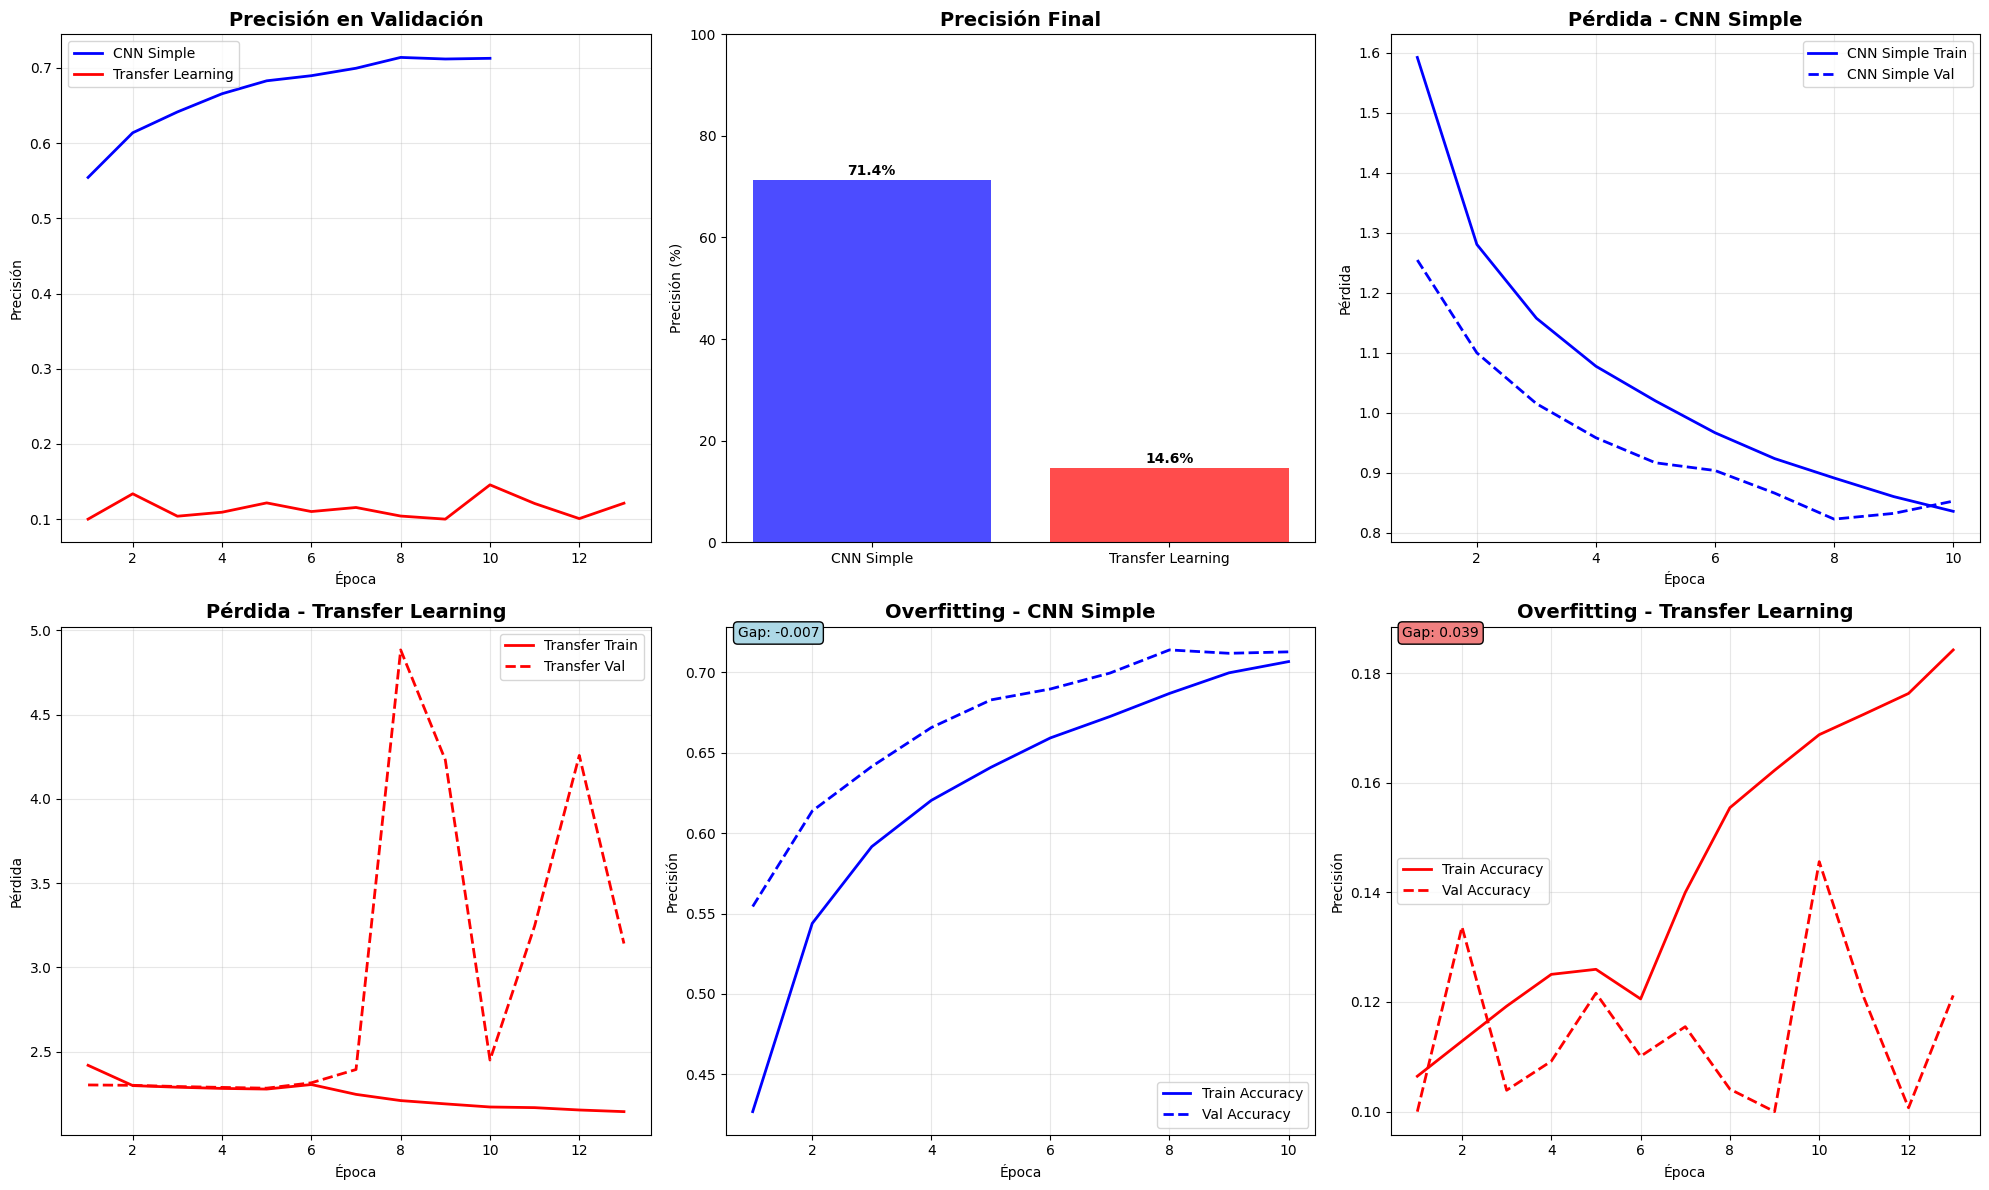


🔍 ANÁLISIS DE OVERFITTING:
🏗️ CNN Simple - Gap Train-Val: -0.007
🎯 Transfer Learning - Gap Train-Val: 0.039

📋 REPORTE DE CLASIFICACIÓN - CNN SIMPLE:
              precision    recall  f1-score   support

    airplane       0.73      0.82      0.77      1000
  automobile       0.80      0.84      0.82      1000
        bird       0.71      0.56      0.63      1000
         cat       0.60      0.39      0.47      1000
        deer       0.75      0.53      0.62      1000
         dog       0.60      0.68      0.63      1000
        frog       0.65      0.87      0.74      1000
       horse       0.76      0.78      0.77      1000
        ship       0.84      0.82      0.83      1000
       truck       0.71      0.84      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000


📋 REPORTE DE CLASIFICACIÓN - TRANSFER LEARNING:
              precision    recall  f1-sco

In [10]:
# === EVALUACIÓN FINAL ===

print("📊 EVALUACIÓN FINAL")
print("-" * 50)

# Evaluar ambos modelos
simple_loss, simple_acc = simple_cnn.evaluate(x_test, y_test, verbose=0)
transfer_loss, transfer_acc = transfer_model.evaluate(x_test, y_test, verbose=0)

# Comparar resultados
print("📊 COMPARACIÓN FINAL:")
print(f"🏗️ CNN Simple: {simple_acc:.4f} ({simple_acc*100:.2f}%)")
print(f"🎯 Transfer Learning: {transfer_acc:.4f} ({transfer_acc*100:.2f}%)")
print(f"📈 Mejora: {(transfer_acc - simple_acc)*100:+.2f}%")

# Obtener predicciones para análisis detallado
simple_predictions = simple_cnn.predict(x_test)
transfer_predictions = transfer_model.predict(x_test)

# Convertir predicciones a clases
simple_pred_classes = np.argmax(simple_predictions, axis=1)
transfer_pred_classes = np.argmax(transfer_predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Graficar resultados con análisis de overfitting
plt.figure(figsize=(20, 12))

# Crear épocas específicas para cada métrica
simple_acc_epochs = range(1, len(simple_train_acc) + 1)
simple_loss_epochs = range(1, len(simple_history.history['loss']) + 1)

# !! CAMBIO IMPORTANTE: Unimos los historiales para la gráfica completa !!
# Ensure histories are lists before concatenating
transfer_train_acc = list(transfer_history.history['accuracy']) + list(fine_tune_history.history['accuracy'])
transfer_test_acc = list(transfer_history.history['val_accuracy']) + list(fine_tune_history.history['val_accuracy'])
transfer_history_loss = list(transfer_history.history['loss']) + list(fine_tune_history.history['loss'])
transfer_history_val_loss = list(transfer_history.history['val_loss']) + list(fine_tune_history.history['val_loss'])

transfer_acc_epochs = range(1, len(transfer_train_acc) + 1)
transfer_loss_epochs = range(1, len(transfer_history_loss) + 1)


# 1. Precisión en Validación
plt.subplot(2, 3, 1)
plt.plot(simple_acc_epochs, simple_test_acc, 'b-', label='CNN Simple', linewidth=2)
plt.plot(transfer_acc_epochs, transfer_test_acc, 'r-', label='Transfer Learning', linewidth=2)
plt.title('Precisión en Validación', fontsize=14, fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Precisión Final (Bar Chart)
plt.subplot(2, 3, 2)
models = ['CNN Simple', 'Transfer Learning']
accuracies = [simple_acc*100, transfer_acc*100]
bars = plt.bar(models, accuracies, color=['blue', 'red'], alpha=0.7)
plt.title('Precisión Final', fontsize=14, fontweight='bold')
plt.ylabel('Precisión (%)')
plt.ylim(0, 100)

for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    plt.text(bar.get_x() + bar.get_width()/2, acc + 1, f'{acc:.1f}%',
             ha='center', fontweight='bold')

# 3. Pérdida durante Entrenamiento (CNN Simple)
plt.subplot(2, 3, 3)
plt.plot(simple_loss_epochs, simple_history.history['loss'], 'b-', label='CNN Simple Train', linewidth=2)
plt.plot(simple_loss_epochs, simple_history.history['val_loss'], 'b--', label='CNN Simple Val', linewidth=2)
plt.title('Pérdida - CNN Simple', fontsize=14, fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Pérdida durante Entrenamiento (Transfer Learning)
plt.subplot(2, 3, 4)
plt.plot(transfer_loss_epochs, transfer_history_loss, 'r-', label='Transfer Train', linewidth=2)
plt.plot(transfer_loss_epochs, transfer_history_val_loss, 'r--', label='Transfer Val', linewidth=2)
plt.title('Pérdida - Transfer Learning', fontsize=14, fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Análisis de Overfitting - CNN Simple
plt.subplot(2, 3, 5)
train_acc = simple_history.history['accuracy']
val_acc = simple_history.history['val_accuracy']
plt.plot(simple_acc_epochs, train_acc, 'b-', label='Train Accuracy', linewidth=2)
plt.plot(simple_acc_epochs, val_acc, 'b--', label='Val Accuracy', linewidth=2)
plt.title('Overfitting - CNN Simple', fontsize=14, fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True, alpha=0.3)

# Calcular gap de overfitting
overfitting_gap_simple = max(train_acc) - max(val_acc)
plt.text(0.02, 0.98, f'Gap: {overfitting_gap_simple:.3f}',
         transform=plt.gca().transAxes, fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))

# 6. Análisis de Overfitting - Transfer Learning
plt.subplot(2, 3, 6)
train_acc_tl = transfer_train_acc
val_acc_tl = transfer_test_acc
plt.plot(transfer_acc_epochs, train_acc_tl, 'r-', label='Train Accuracy', linewidth=2)
plt.plot(transfer_acc_epochs, val_acc_tl, 'r--', label='Val Accuracy', linewidth=2)
plt.title('Overfitting - Transfer Learning', fontsize=14, fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True, alpha=0.3)

# Calcular gap de overfitting
overfitting_gap_tl = max(train_acc_tl) - max(val_acc_tl)
plt.text(0.02, 0.98, f'Gap: {overfitting_gap_tl:.3f}',
         transform=plt.gca().transAxes, fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))

plt.tight_layout()
plt.show()

# Análisis de overfitting
print("\n🔍 ANÁLISIS DE OVERFITTING:")
print(f"🏗️ CNN Simple - Gap Train-Val: {overfitting_gap_simple:.3f}")
print(f"🎯 Transfer Learning - Gap Train-Val: {overfitting_gap_tl:.3f}")

if overfitting_gap_simple > 0.1:
    print("⚠️ CNN Simple muestra overfitting significativo")
if overfitting_gap_tl > 0.1:
    print("⚠️ Transfer Learning muestra overfitting significativo")

# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN - CNN SIMPLE:")
print(classification_report(true_classes, simple_pred_classes, target_names=class_names))

print("\n📋 REPORTE DE CLASIFICACIÓN - TRANSFER LEARNING:")
print(classification_report(true_classes, transfer_pred_classes, target_names=class_names))